In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Migraine.csv',index_col=0)

In [3]:
df.head()

,id,time,dos,hatype,age,airq,medication,headache,sex
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


### Check whether 'age' is a factor affecting 'headache'

In [4]:
df['headache'].value_counts()

yes    2666
no     1486
Name: headache, dtype: int64

In [5]:
df_headache_yes = df[df['headache'] == 'yes']['age']
df_headache_no = df[df['headache'] == 'no']['age']

##### Check for normality (Shapiro Test)

In [6]:
from scipy.stats import shapiro,bartlett,mannwhitneyu
print(shapiro(df_headache_yes))
print(shapiro(df_headache_no))

(0.9792776107788086, 2.8101786270748695e-19)
(0.9695512652397156, 3.654197080022843e-17)


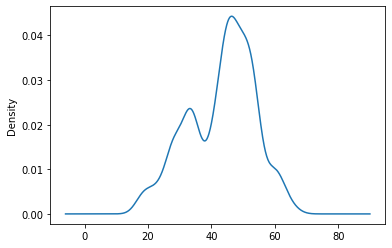

In [7]:
df_headache_no.plot(kind = 'density')

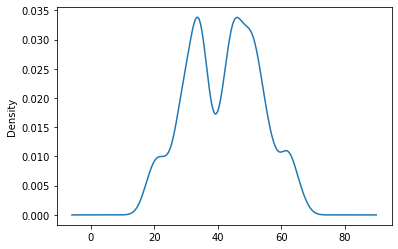

In [8]:
df_headache_yes.plot(kind = 'density')

As p-value is very less, we reject the null hypothesis that the samples are normally distributed. So now we will check for Bartllet test for checking the variance.
##### Bartlett test (Test for equal variances)

In [9]:
bartlett(df_headache_no,df_headache_yes)

BartlettResult(statistic=18.81174320090529, pvalue=1.4427606409205942e-05)

Even the bartlett test fails as pvalue is less than 0.05. So the variances of both the samples are also not equal. So we need to go for non-parametric test.
##### Manwhitneyu
H0 : avg_age_headache = avg_age_no_headache

H1 : avg_age_headache != avg_age_no_headache

In [10]:
mannwhitneyu(df_headache_no,df_headache_yes)

MannwhitneyuResult(statistic=1838755.0, pvalue=6.146547744582879e-05)

As we can see, the probability of H0 being true is very very negligible, so we reject H0 and can say that age is a factor which affects the headache.

### Check whether 'gender' is a factor affecting 'headache'

In [11]:
df['sex'].value_counts()

female    3545
male       607
Name: sex, dtype: int64

In [12]:
ct = pd.crosstab(df['headache'],df['sex'])
print(ct)

sex       female  male
headache              
no          1266   220
yes         2279   387


##### H0 : prop_female_headache = prop_male_headache
##### H1 : prop_female_headache != prop_male_headache

In [13]:
prop_female_headache = 2279/3545
prop_male_headache = 387/607
print(prop_female_headache,prop_male_headache)

0.6428772919605078 0.6375617792421746


In [14]:
from statsmodels.stats.proportion import proportions_ztest
x = np.array([2279,387])
n=  np.array([3545,607])
proportions_ztest(x,n)

(0.2524275906432048, 0.8007105762350393)

Fail to reject the null hypothesis. So gender is not the factor affecting the headaches.

### Check whether 'gender' is a factor affecting 'hatype'(headache type)

In [15]:
ct = pd.crosstab(df['hatype'],df['sex'])
print(ct)

sex      female  male
hatype               
Aura       1593   117
Mixed       291   166
No Aura    1661   324


In [16]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

(259.94962922327386,
 3.569893234435195e-57,
 2,
 array([[1460.00722543,  249.99277457],
        [ 390.18906551,   66.81093449],
        [1694.80370906,  290.19629094]]))

Reject the null hypothesis. So gender is a factor affecting the types of headaches.

##### Post hoc analysis

In [17]:
print('Aura : Female - ',1593/3545,", Male - ",117/607)
print('Mixed : Female - ',291/3545,", Male - ",166/607)
print('No Aura : Female - ',1661/3545,", Male - ",324/607)

Aura : Female -  0.44936530324400564 , Male -  0.1927512355848435
Mixed : Female -  0.08208744710860366 , Male -  0.27347611202635913
No Aura : Female -  0.4685472496473907 , Male -  0.5337726523887973


We can see, Female are highly sensitive to Aura type of headaches, Male are highly sensitive to Miixed type of headache and for No Aura, both Female and Male are quite equally sensitive.

### Adjusted Rsquare

adj_rsquare = (1-rsquare)*(N-1)/(N-p-1)

N -> total number of observations in sample

p -> number of features

In [18]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [19]:
df.drop('Over18',axis = 1,inplace = True)

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [22]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

1. Check whether attrition rate is based on Gender.

In [23]:
pd.crosstab(df['Attrition'],df['Gender'])

Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


H0 : prop_attrition_female = prop_attrition_male

H1 : prop_attrition_female != prop_attrition_male

In [24]:
prop_attrition_female = 87/588
prop_attrition_male = 150/882

In [25]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([87,150])
nobs = np.array([588,882])
proportions_ztest(count,nobs)

(-1.1292547809155016, 0.2587903704911598)

As the p-value is greater than 0.05, we fail to reject the null hypothesis. So we can say that the attrition rate of the organisation is not based on Gender.

2. Check whether attrition rate is based on Department.

H0 : prop_attrition_HR = prop_attrition_R&D = prop_attrition_Sales

H1 : prop_attrition_HR != prop_attrition_R&D != prop_attrition_Sales

In [26]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [27]:
ct = pd.crosstab(df['Attrition'],df['Department'])
ct

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [28]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[ 52.84285714, 806.06326531, 374.09387755],
        [ 10.15714286, 154.93673469,  71.90612245]]))

We can see from the chi2 test that the attrition rate is affected by deparment as the pvalue is less than 0.05.
##### Post hoc analysis

In [29]:
prop_attrition_yes_HR = 12/63
prop_attrition_yes_RnD = 133/961
prop_attrition_yes_Sales = 92/446
prop_attrition_no_HR = 51/63
prop_attrition_no_RnD = 828/961
prop_attrition_no_Sales = 354/446
print('prop_attrition_yes_HR : ',prop_attrition_yes_HR)
print('prop_attrition_yes_RnD : ',prop_attrition_yes_RnD)
print('prop_attrition_yes_Sales : ',prop_attrition_yes_Sales)
print('prop_attrition_no_HR : ',prop_attrition_no_HR)
print('prop_attrition_no_RnD : ',prop_attrition_no_RnD)
print('prop_attrition_no_Sales : ',prop_attrition_no_Sales)

prop_attrition_yes_HR :  0.19047619047619047
prop_attrition_yes_RnD :  0.1383975026014568
prop_attrition_yes_Sales :  0.2062780269058296
prop_attrition_no_HR :  0.8095238095238095
prop_attrition_no_RnD :  0.8616024973985432
prop_attrition_no_Sales :  0.7937219730941704


Attrition rate of Research and Development Department is quiet less as compared to HR and Sales deparment.

3. Is there any discrepancy in monthly income avg with respect to Gender.

H0 : avg_monthlyincome_female = avg_monthlyincome_male

H1 : avg_monthlyincome_female != avg_monthlyincome_male

In [30]:
df_male_income = df[df['Gender'] == 'Male']['MonthlyIncome']
df_female_income = df[df['Gender'] == 'Female']['MonthlyIncome']

##### Shapiro test

In [31]:
from scipy.stats import shapiro
print(shapiro(df_male_income))
print(shapiro(df_female_income))

(0.8169718384742737, 1.709933327621381e-30)
(0.8416616916656494, 9.378564564919968e-24)


##### Bartlett test

In [32]:
from scipy.stats import bartlett
print(bartlett(df_male_income,df_female_income))

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)


##### Manwhitneyu

In [33]:
from scipy.stats import mannwhitneyu
print(mannwhitneyu(df_male_income,df_female_income))

MannwhitneyuResult(statistic=245722.5, pvalue=0.044208341633010594)


As the p-value is less than 0.05, we reject the null hypothesis. So we can say that the avg monthly income of the empoyees in the organisation is Gender based.

##### Post hoc analysis

In [34]:
print(df_male_income.mean(),df_female_income.mean())

6380.507936507936 6686.566326530612


As we can see quite evidently that females an average monthly income of around 6700 whereas males have an average monthly income of around 6400. So there seems to be quiet a significant difference in their salaries.

4. Is there any discrepancy in monthly income avg with respect to Department.

H0 : avg_monthlyincome_HR = avg_monthlyincome_R&D = avg_monthlyincome_Sales

H1 : avg_monthlyincome_HR != avg_monthlyincome_R&D != avg_monthlyincome_Sales

In [35]:
df_HR_income = df[df['Department'] == 'Human Resources']['MonthlyIncome']
df_RnD_income = df[df['Department'] == 'Research & Development']['MonthlyIncome']
df_Sales_income = df[df['Department'] == 'Sales']['MonthlyIncome']

In [36]:
from scipy.stats import f_oneway
f_oneway(df_HR_income,df_RnD_income,df_Sales_income)

F_onewayResult(statistic=3.2017829294201716, pvalue=0.04097409724987449)

We can see from the oneway test that the monthly income of employees is affected by deparment as the pvalue is less than 0.05.

##### Post hoc analysis

In [37]:
print('Avg monthly income of HR Department : ',df_HR_income.mean())
print('Avg monthly income of R&D Department : ',df_RnD_income.mean())
print('Avg monthly income of Sales Department : ',df_Sales_income.mean())

Avg monthly income of HR Department :  6654.507936507936
Avg monthly income of R&D Department :  6281.252861602497
Avg monthly income of Sales Department :  6959.17264573991


As we can see quite evidently that the employees from Sales department has an average monthly income of around 7000 whereas employees from Reasearch and Development have an average monthly income of around 6300. So there seems to be quiet a significant difference in their salaries.

5. Is there any discrepancy in monthly income avg with respect to Education.

In [38]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

H0 : avg_mnthInc_EduLvl1 = avg_mnthInc_EduLvl2 = avg_mnthInc_EduLvl3 = avg_mnthInc_EduLvl4 = avg_mnthInc_EduLvl5

H1 : avg_mnthInc_EduLvl1 != avg_mnthInc_EduLvl2 != avg_mnthInc_EduLvl3 != avg_mnthInc_EduLvl4 != avg_mnthInc_EduLvl5

In [39]:
df_mnthInc_EduLvl1 = df[df['Education'] == 1]['MonthlyIncome']
df_mnthInc_EduLvl2 = df[df['Education'] == 2]['MonthlyIncome']
df_mnthInc_EduLvl3 = df[df['Education'] == 3]['MonthlyIncome']
df_mnthInc_EduLvl4 = df[df['Education'] == 4]['MonthlyIncome']
df_mnthInc_EduLvl5 = df[df['Education'] == 5]['MonthlyIncome']

In [40]:
f_oneway(df_mnthInc_EduLvl1,df_mnthInc_EduLvl2,df_mnthInc_EduLvl3,df_mnthInc_EduLvl4,df_mnthInc_EduLvl5)

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)

We can see from the oneway test that the monthly income of employees is affected by education level of the employee as the pvalue is less than 0.05.

##### Post hoc analysis

In [41]:
print('Avg monthly income for employees with Education Level 1 : ',df_mnthInc_EduLvl1.mean())
print('Avg monthly income for employees with Education Level 2 : ',df_mnthInc_EduLvl2.mean())
print('Avg monthly income for employees with Education Level 3 : ',df_mnthInc_EduLvl3.mean())
print('Avg monthly income for employees with Education Level 4 : ',df_mnthInc_EduLvl4.mean())
print('Avg monthly income for employees with Education Level 5 : ',df_mnthInc_EduLvl5.mean())

Avg monthly income for employees with Education Level 1 :  5640.570588235294
Avg monthly income for employees with Education Level 2 :  6226.645390070922
Avg monthly income for employees with Education Level 3 :  6517.263986013986
Avg monthly income for employees with Education Level 4 :  6832.402010050251
Avg monthly income for employees with Education Level 5 :  8277.645833333334


As we can see quite evidently that the employees with Higher Education level has higher average monthly income.

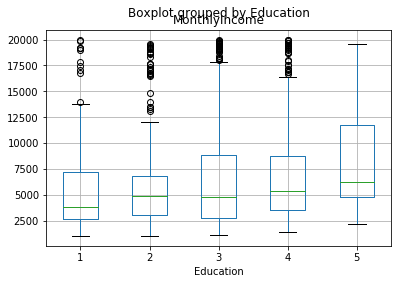

In [42]:
df.boxplot(column='MonthlyIncome',by = 'Education')

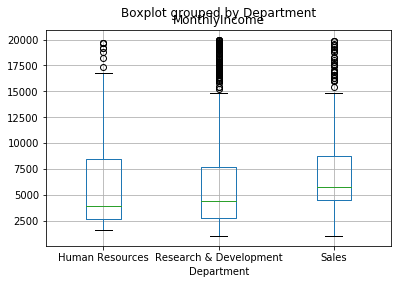

In [43]:
df.boxplot(column='MonthlyIncome',by = 'Department')

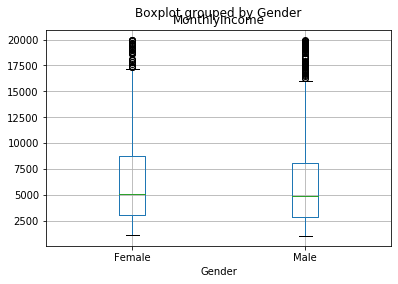

In [44]:
df.boxplot(column='MonthlyIncome',by = 'Gender')